<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Figure-11.1" data-toc-modified-id="Figure-11.1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Figure 11.1</a></span></li><li><span><a href="#Figure-11.2" data-toc-modified-id="Figure-11.2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Figure 11.2</a></span></li><li><span><a href="#Figure-11.3" data-toc-modified-id="Figure-11.3-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Figure 11.3</a></span></li><li><span><a href="#Figure-11.4" data-toc-modified-id="Figure-11.4-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Figure 11.4</a></span></li><li><span><a href="#Figure-11.5" data-toc-modified-id="Figure-11.5-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Figure 11.5</a></span></li><li><span><a href="#FIgure-11.6" data-toc-modified-id="FIgure-11.6-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>FIgure 11.6</a></span></li><li><span><a href="#Figure-11.7" data-toc-modified-id="Figure-11.7-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Figure 11.7</a></span></li><li><span><a href="#Figure-11.9" data-toc-modified-id="Figure-11.9-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Figure 11.9</a></span></li><li><span><a href="#Figure-11.10" data-toc-modified-id="Figure-11.10-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Figure 11.10</a></span></li><li><span><a href="#Figure-11.11" data-toc-modified-id="Figure-11.11-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Figure 11.11</a></span></li><li><span><a href="#Figure-11.12" data-toc-modified-id="Figure-11.12-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Figure 11.12</a></span></li></ul></div>

In [1]:
## Analyzing Neural Time Series Data
# Python code for Chapter 11
# Yujin Goto (MATLAB original code: Mike X Cohen)
# 
# This code accompanies the book, titled "Analyzing Neural Time Series Data" 
# (MIT Press). Using the code without following the book may lead to confusion, 
# incorrect data analyses, and misinterpretations of results. 
# Mike X Cohen and Yujin Goto assumes no responsibility for inappropriate or incorrect use of this code. 

In [2]:
import numpy as np
import scipy.io
from matplotlib import pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import mne
from mne import events_from_annotations

## Figure 11.1

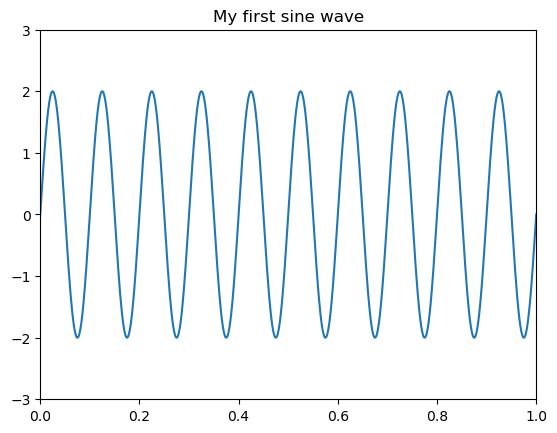

In [3]:
srate = 1000. #sampling rate of 1kHz
time = np.arange(-1,1 +1/srate,1/srate) 
freq = 10 #in Hz
amp = 2 #amplitude, or height of sine wave

sine_wave = amp*np.sin(2*np.pi*freq*time)

plt.figure()
plt.plot(time,sine_wave)
plt.axis([0,1,-3,3])
_=plt.title("My first sine wave")

## Figure 11.2

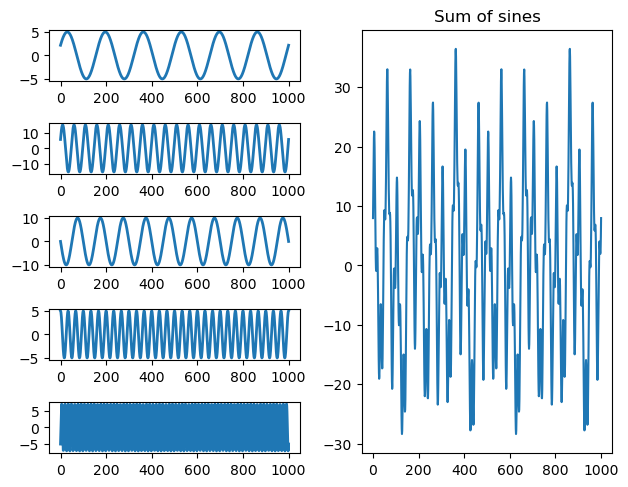

In [4]:
# define a sampling rate
srate = 500

# list some frequencies
frex = np.array([3, 10, 5 ,15, 35])

# list some random amplitudes... make sure there are 
# the same number of amplitudes as there are frequencies!
amplit = np.array([5, 15, 10, 5, 7])

# phases... list some random numbers between -pi and pi
phases = np.pi*np.array([1/7.,1/8.,1.,1/2.,-1/4.])

# define time...
time = np.arange(-1,1 +1/srate,1/srate) 

# now we loop through frequencies and create sine waves
sine_waves = np.zeros([len(frex),len(time)]) #  remember: always initialize!

for fi in range(len(frex)):
    sine_waves[fi,:] = amplit[fi] * np.sin(2*np.pi*frex[fi]*time +phases[fi])

# now plot each wave separately
plt.figure()

for fi in range(len(frex)):
    plt.subplot(len(frex),2,2*(fi+1)-1)
    plt.plot(sine_waves[fi,:],linewidth=2)
        
# now plot the result
plt.subplot(1,2,2)
plt.plot(np.sum(sine_waves,axis=0))
plt.tight_layout()    
_=plt.title("Sum of sines")

## Figure 11.3

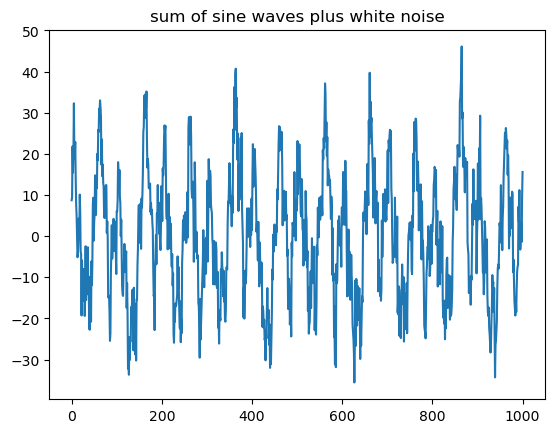

In [5]:
plt.figure()
noise = 5 * np.random.randn(np.shape(sine_waves)[1])
plt.plot( np.sum(sine_waves,axis=0) + noise )
_=plt.title("sum of sine waves plus white noise")

## Figure 11.4

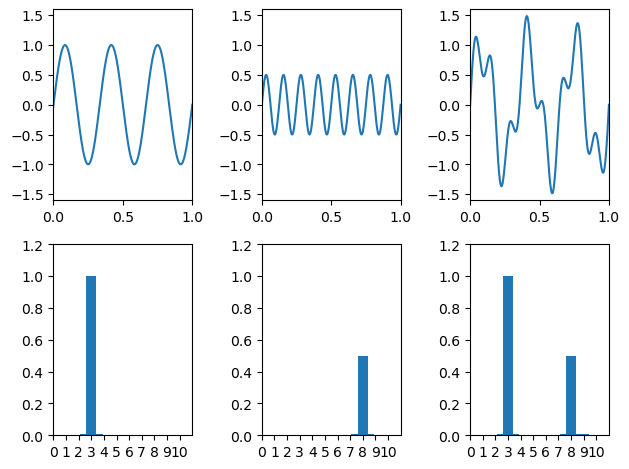

In [6]:
time = np.arange(-1, 1+1/srate, 1/srate)

#create three sine waves
s1 = np.sin(2*np.pi*3*time)
s2 = 0.5 * np.sin(2*np.pi*8*time)
s3 = s1 + s2

s_list = [s1, s2, s3]

#plot the sine waves
f = plt.figure()

for i in range(3):
    plt.subplot(2, 3, i+1)
    
    plt.plot(time, s_list[i])
    plt.axis([0,1,-1.6,1.6])
    plt.yticks(np.arange(-1.5,2,.5))
    
    plt.subplot(2,3,i+1+3)
    
    f = np.fft.fft(s_list[i])/float(len(time))
    hz = np.linspace(0, srate/2., int(np.floor(len(time)/2.)+1))
    plt.bar(hz,np.abs(f[:len(hz)]*2))
    plt.axis([0,11,0,1.2])
    plt.xticks(np.arange(0,11))
    
plt.tight_layout()

## Figure 11.5

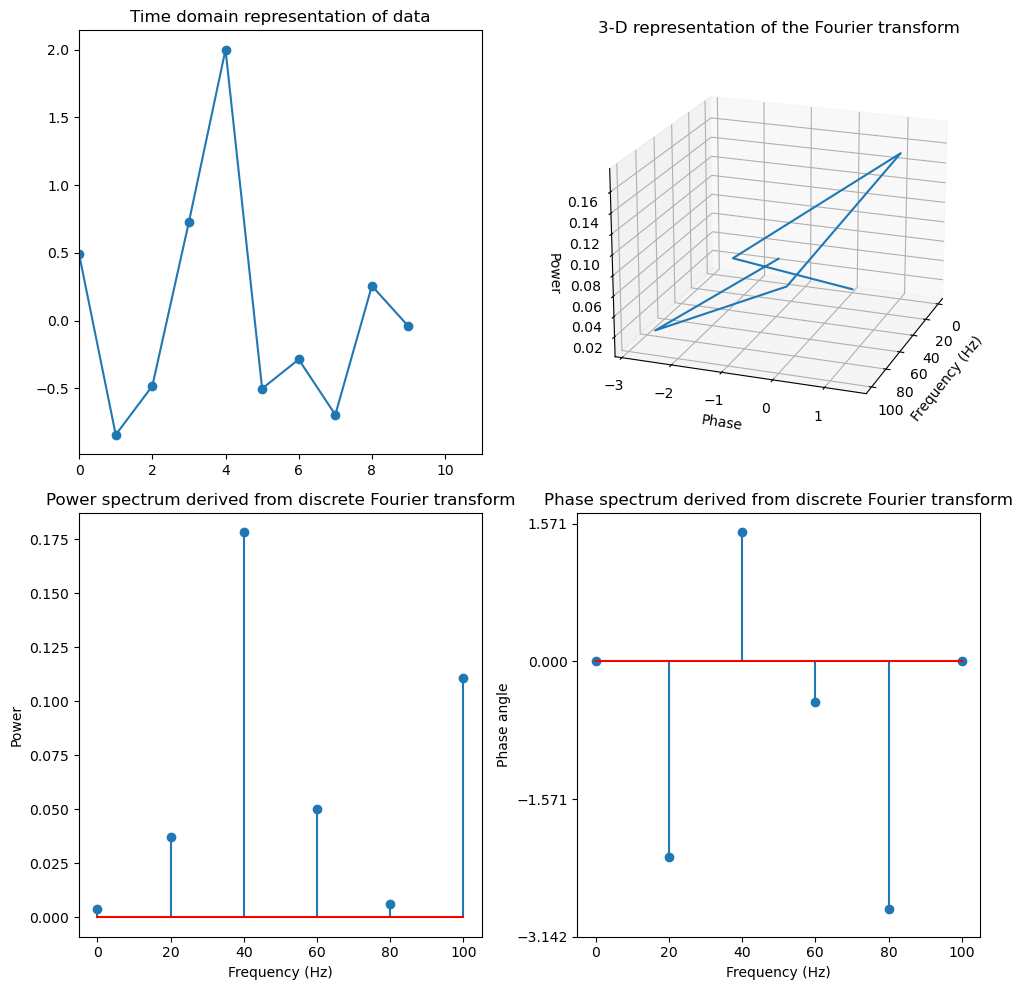

In [31]:
N        = 10                 # length of sequence
data     = np.random.randn(N) # random numbers
srate    = 200                # sampling rate in Hz
nyquist  = srate/2            # Nyquist frequency -- the highest frequency you can measure in the data

# initialize matrix for Fourier output
fourier = np.zeros(N)*1j #create complex matrix

# % These are the actual frequencies in Hz that will be returned by the
# Fourier transform. The number of unique frequencies we can measure is
# exactly 1/2 of the number of data points in the time series (plus DC). 
frequencies = np.linspace(0, nyquist, N//2+1)
time = np.arange(N)/float(N)

#Fourier transform is dot product between sine wave and data at each frequency
for fi in range(N):
    sine_wave   = np.exp(-1j *2 * np.pi * fi * time)
    fourier[fi] = np.sum(sine_wave * data)
    
fourier = fourier/float(N)

fig = plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.plot(data,"-o")
plt.xlim([0,N+1])
plt.title("Time domain representation of data")

ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.plot(frequencies, np.angle(fourier[:N//2+1]), zs=np.abs(fourier[:N//2+1])**2)
ax.view_init(20, 20)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Phase')
ax.set_zlabel('Power')
plt.title("3-D representation of the Fourier transform")

plt.subplot(2, 2, 3)
plt.stem(frequencies, np.abs(fourier[:N//2+1])**2, linefmt='-', markerfmt='o', basefmt='r-')
plt.xlim([-5, 105])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.title("Power spectrum derived from discrete Fourier transform")

plt.subplot(2, 2, 4)
plt.stem(frequencies, np.angle(fourier[:N//2+1]), linefmt='-', markerfmt='o', basefmt='r-')
plt.xlim([-5, 105])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase angle")
plt.yticks(np.arange(-np.pi, np.pi, np.pi/2.))
plt.title("Phase spectrum derived from discrete Fourier transform")

plt.tight_layout()

## FIgure 11.6

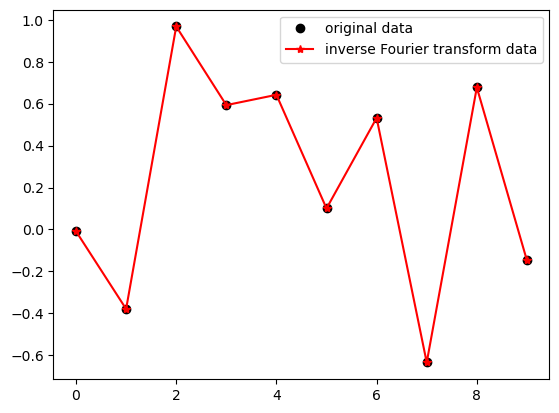

In [8]:
# Compute sine waves and sum to recover the original time series
reconstructed_data = np.zeros(N)

for fi in range(N):
    #scale sine wave by fourier coefficient
    sine_wave = fourier[fi] * np.exp(1j *2 * np.pi * fi * time)
    
    # sum sine waves together (take only real part)
    reconstructed_data += np.real(sine_wave)
    
plt.figure()
plt.plot(data,'ko',linewidth=4)
plt.plot(reconstructed_data,'r-*')
_=plt.legend(["original data","inverse Fourier transform data"])

## Figure 11.7

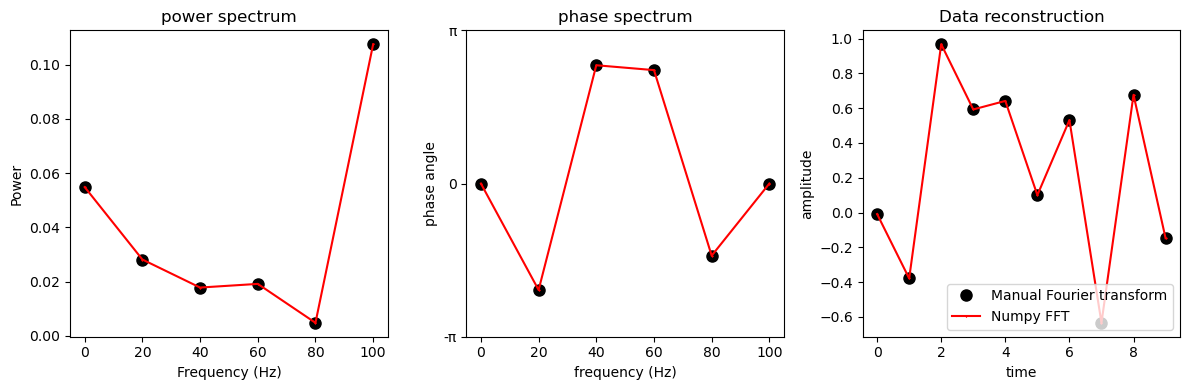

In [9]:
fft_data = np.fft.fft(data)/N

fig, ax = plt.subplots(1, 3, figsize=(12,4))

# Power spectrum derived from discrete fourier transform and from FFT
ax[0].plot(frequencies, np.abs(fourier[:N//2+1])**2,'ko',markersize=8, linewidth=5)
ax[0].plot(frequencies, np.abs(fft_data[:N//2+1])**2,'r*-',markersize=1)
ax[0].set(title='power spectrum', xlabel="Frequency (Hz)", ylabel="Power")

# Phase spectrum derived from discrete fourier transofrm and from FFT
ax[1].plot(frequencies, np.angle(fourier[:N//2+1]), 'ko', markersize=8, linewidth=5)
ax[1].plot(frequencies, np.angle(fft_data[:N//2+1]), 'r*-', markersize=1)
ax[1].set(title='phase spectrum', xlabel='frequency (Hz)', ylabel='phase angle')
ax[1].set_yticks([-np.pi, 0, np.pi])
ax[1].set_yticklabels(['-π', '0', 'π'])


# Manual inverse fourier transform and ifft
ifftData = np.real(np.fft.ifft(np.fft.fft(data)))

ax[2].plot(reconstructed_data, 'ko', markersize=8, linewidth=5)
ax[2].plot(ifftData,'r*-',markersize=1)
ax[2].set(title='Data reconstruction', ylabel='amplitude', xlabel='time')
plt.legend(["Manual Fourier transform","Numpy FFT"], loc='lower right')
fig.tight_layout()

## Figure 11.9

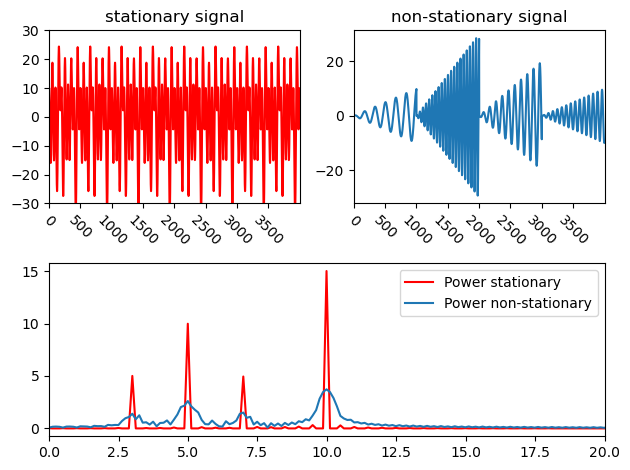

In [10]:
# list some frequencies
frex = np.array([3,10,5,7])

# list some random amplitudes
amplit = np.array([5,15,10,5])

# phases... 
phases = np.pi*np.array([np.pi/7, np.pi/8, np.pi, np.pi/2])

#create a time series of sequenced sine waves
srate = 500
time = np.arange(-1,1+1/srate,1/srate)
stationary = np.zeros(len(time)*len(frex))
nonstationary = np.zeros(len(time)*len(frex))

for fi in range(len(frex)):
    #compute sine wave
    temp_sine_wave = amplit[fi] * np.sin(2*np.pi*frex[fi]*time+phases[fi])
    
    #enter into stationary time series
    stationary = stationary + np.tile(temp_sine_wave,(1,len(frex)))
    
    #optional change of amplitude over time
    temp_sine_wave *=time+1
    
    #start and stop indices for insertion of sine wave
    start_idx = fi * len(time)
    stop_idx = fi *len(time) + len(time)
    
    #enter into non-stationary time series
    nonstationary[start_idx:stop_idx] = temp_sine_wave

    
plt.figure()
plt.subplot(2, 2, 1)
plt.plot(stationary[0],'r')
plt.axis([0,stationary.shape[1],-30,30])
plt.title("stationary signal")
_,xticks=plt.xticks(np.arange(0,4000,500))
plt.setp(xticks,rotation=-45)

plt.subplot(2, 2, 2)
plt.plot(nonstationary)
plt.xlim([1,len(nonstationary)])
plt.title("non-stationary signal")
_,xticks=plt.xticks(np.arange(0,4000,500))
plt.setp(xticks,rotation=-45)

frequencies = np.linspace(0,srate/2, len(nonstationary)//2+1)
fft_nonstationary = np.fft.fft(nonstationary)/len(nonstationary)
fft_stationary = np.fft.fft(stationary[0])/stationary.shape[1]

plt.subplot(2, 1, 2)
plt.plot(frequencies,np.abs(fft_stationary[:len(frequencies)]*2),'r')
plt.plot(frequencies,np.abs(fft_nonstationary[:len(frequencies)]*2))
plt.xlim([0,np.max(frex)*2])
plt.legend(["Power stationary","Power non-stationary"])

plt.tight_layout()    

## Figure 11.10

In [11]:
# load EEG data (.vhdr converted ver. by Yujin)
mne.set_log_level('CRITICAL') # delete this line for your environment
raw = mne.io.read_raw_brainvision('./NeuralData/sampleEEGdata_convert.vhdr', eog=['HEOG', 'VEOG'], preload=True)
mne.set_log_level('INFO') # delete this line for your environment

# load electrodes location montage
montage = mne.channels.read_custom_montage('./NeuralData/sampleEEG_loc.loc')
raw.set_montage(montage)

# Getting event timings (for .mat file, you don't have to do this.) and epoching
events, event_dict = events_from_annotations(raw)

epochs = mne.Epochs(
    raw,
    events,
    event_id = {'New Segment/': 99999},
    tmin = 0,
    tmax = 2.496,
    baseline = None,
)

# Extract variables
data = epochs.get_data()*(10**6)                 # EEG data (array; trial, ch, time). MNE-pyton reads data in volts(V), not microvolts (μV).
pnts = data.shape[2]                             # Number of points in EEG data (scalar)
times = epochs.times-1                           # Time points of data (array)
tmin = epochs.tmin-1                             # The start timing of epoch (the start timing of the baseline is set to be 0 in default)
tmax = epochs.tmax-1                             # The end timing of epoch
srate = epochs.info['sfreq']                     # Sampling rate (scalar)
trials = len(epochs.events)                      # Trials (scalar)
nbchan = len(epochs.ch_names)                    # Number of channel (scalar)


chan_labels = epochs.info['ch_names']

# channel locations
chan_pos = []
for ch in epochs.info['chs']:
    x,y,z = ch['loc'][:3]
    chan_pos.append((x,y,z))

Used Annotations descriptions: ['New Segment/', 'Stimulus/1', 'Stimulus/2', 'Stimulus/31', 'Stimulus/32', 'Stimulus/51', 'Stimulus/52']
Not setting metadata
99 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 99 events and 640 original time points ...
0 bad epochs dropped


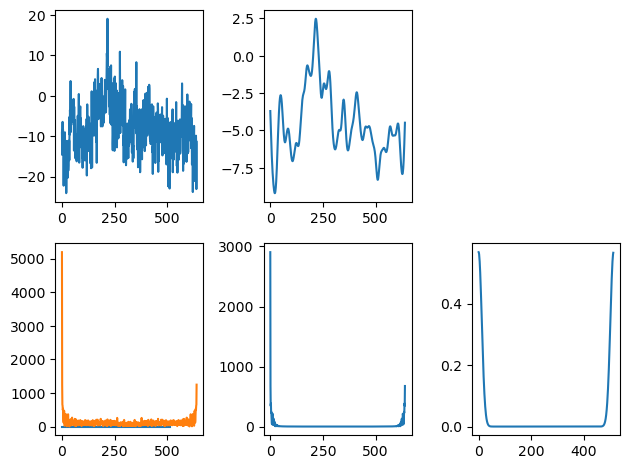

In [12]:
eegdat4convol=data[0,0,:]

# create Gaussian (you'll learn more about this formula in the next chapter)
time = np.arange(-1,1+1/srate,1/srate)
s = 5/float(2*np.pi*30) #standard deviation
gaussian = 1/30.*np.exp((-time**2)/(2*s**2))


plt.figure()
plt.subplot(2,3,1)
plt.plot(eegdat4convol)

plt.subplot(2,3,4)
plt.plot(gaussian)

plt.subplot(2,3,2)
convolvedSig=np.convolve(eegdat4convol,gaussian,mode='same')
plt.plot(convolvedSig)

plt.subplot(2,3,5)
plt.plot(np.abs(np.fft.fft(convolvedSig)))

plt.subplot(2,3,4)
plt.plot(np.abs(np.fft.fft(eegdat4convol)))

plt.subplot(2,3,6)
plt.plot(np.abs(np.fft.fft(gaussian)))

plt.tight_layout()

## Figure 11.11

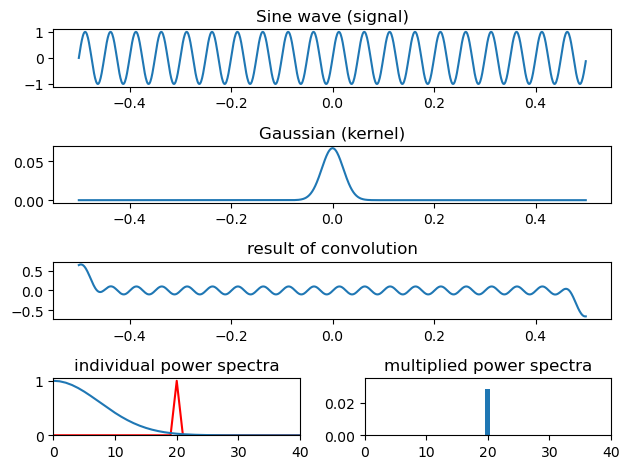

In [13]:
srate = 1000
time = np.arange(-0.5,0.5,1/srate)
f = 20
fg = np.array([15, 5])
s = np.sin(2*np.pi*f*time)


g = np.exp((-time**2)/(2*(4/((2*np.pi*fg[0])**2))))/fg[0]
plt.figure()

plt.subplot(4,1,1)
plt.plot(time,s)
plt.title("Sine wave (signal)")

plt.subplot(4,1,2)
plt.plot(time,g)
plt.title("Gaussian (kernel)")

plt.subplot(4,1,3)
plt.plot(time,np.convolve(s, g, mode="same"))
plt.title("result of convolution")

plt.subplot(4,2,7)
fft_s = np.abs(np.fft.fft(s))
fft_s = fft_s[:(len(fft_s)//2)+1] / np.max(fft_s[:(len(fft_s)//2)+1])
plt.plot(np.arange(0,501), fft_s, 'r')

fft_g = np.abs(np.fft.fft(g))
fft_g = fft_g[:(len(fft_g)//2)+1] / np.max(fft_g[:(len(fft_g)//2)+1])
plt.plot(np.arange(0,501), fft_g)
plt.axis([0,40,0,1.05])
plt.title("individual power spectra")

plt.subplot(4,2,8)
plt.bar(np.arange(0,501), fft_g*fft_s)
plt.axis([0,40,0,0.035])
_=plt.title("multiplied power spectra")

plt.tight_layout()

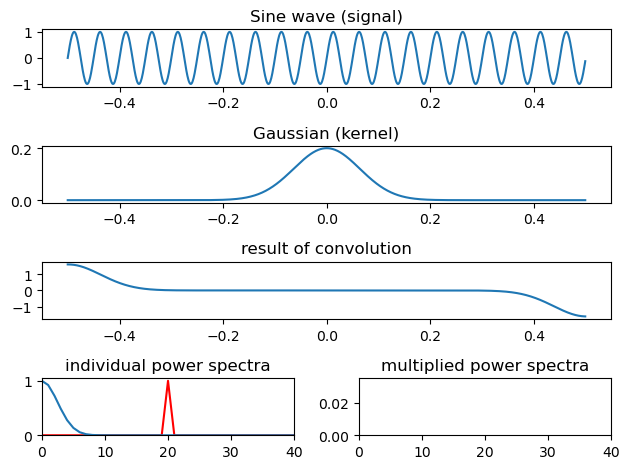

In [14]:
g = np.exp((-time**2)/(2*(4/((2*np.pi*fg[1])**2))))/fg[1]
plt.figure()

plt.subplot(4,1,1)
plt.plot(time,s)
plt.title("Sine wave (signal)")

plt.subplot(4,1,2)
plt.plot(time,g)
plt.title("Gaussian (kernel)")

plt.subplot(4, 1, 3)
plt.plot(time,np.convolve(s, g, mode="same"))
plt.title("result of convolution")

plt.subplot(4,2,7)
fft_s = np.abs(np.fft.fft(s))
fft_s = fft_s[:(len(fft_s)//2)+1] / np.max(fft_s[:(len(fft_s)//2)+1])
plt.plot(np.arange(0,501), fft_s, 'r')

fft_g = np.abs(np.fft.fft(g))
fft_g = fft_g[:(len(fft_g)//2)+1] / np.max(fft_g[:(len(fft_g)//2)+1])
plt.plot(np.arange(0,501), fft_g)
plt.axis([0,40,0,1.05])
plt.title("individual power spectra")

plt.subplot(4, 2, 8)
plt.bar(np.arange(0,501), fft_g*fft_s)
plt.axis([0,40,0,0.035])
_=plt.title("multiplied power spectra")

plt.tight_layout()

## Figure 11.12

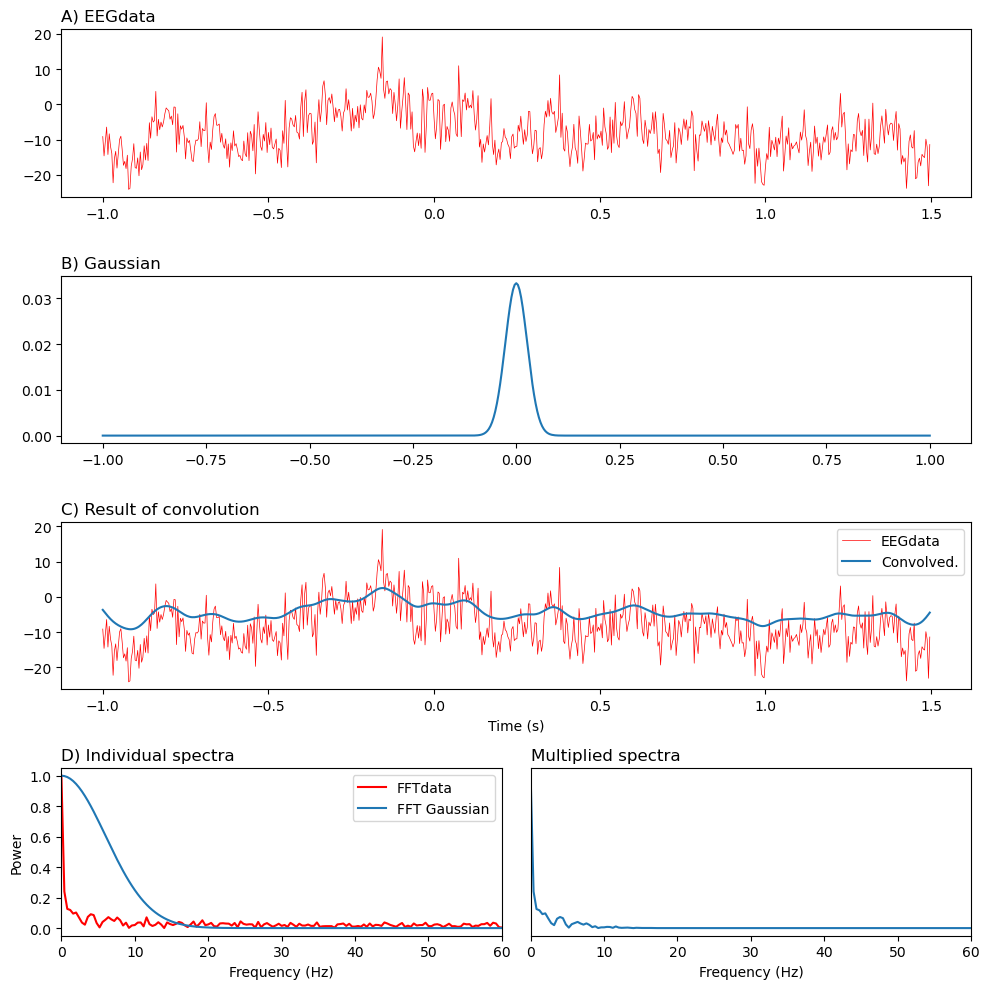

In [25]:
srate = epochs.info['sfreq']
time = np.arange(-1,1+1/srate,1/srate)
s = 5/(2*np.pi*30)
gaussian = np.exp((-time**2)/(2*s**2))/30.

plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
#plot EEG data
plt.subplot(4, 1, 1)
plt.plot(times,eegdat4convol,'r', lw=0.5)
plt.title("A) EEGdata", loc='left')

#plot Gaussian
plt.subplot(4, 1, 2)
plt.plot(time,gaussian)
plt.title("B) Gaussian", loc='left')

#plot convolved
plt.subplot(4, 1, 3)
plt.plot(times,eegdat4convol,'r', lw=0.5)
plt.plot(times,np.convolve(eegdat4convol,gaussian,mode="same"))
plt.title("C) Result of convolution", loc='left')
plt.legend(['EEGdata','Convolved.'])
plt.xlabel('Time (s)')

# Plot power spectrum of signal
plt.subplot(4, 2, 7)
nfft = len(eegdat4convol)
fft_s = np.abs(np.fft.fft(eegdat4convol,nfft))
fft_s = fft_s[:(nfft//2)+1]
f = np.linspace(0, srate/2, (nfft//2)+1)
plt.plot(f,fft_s/np.max(fft_s),'r')

#plot power spectrum of Gaussian
fft_g = np.abs(np.fft.fft(gaussian,nfft))
fft_g = fft_g[:(nfft//2)+1]
plt.plot(f,fft_g/np.max(fft_g))
plt.xlim([0, 60])
plt.title("D) Individual spectra", loc='left')
plt.legend(['FFTdata','FFT Gaussian'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')

#plot the convolved power spectrum
plt.subplot(4, 2, 8)
plt.plot(f,fft_s*fft_g/np.max(fft_g))
plt.xlim([0, 60])
plt.title("Multiplied spectra", loc='left')
plt.xlabel('Frequency (Hz)')
plt.yticks([])

plt.tight_layout()